In [1]:
%matplotlib widget
%load_ext jupyter_black # formater (pip install jupyter_black)

# jeśli wykresy nie będą działać - usuń (zakomentuj) powyższą linijkę i zrestartuj kernel notebooka

import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix # obsługuje display(...) -- pretty printing macierzy

ModuleNotFoundError: No module named 'jupyter_black # formater (pip install jupyter_black)'

---

Użyj odpowiednich funkcji pakietu NumPy aby zdefiniować 
- macierz 3x3 o zadanych wartościach (dowolnych)
- macierz jednostkową o wymiarze 3x3

1. Oblicz "ręcznie" wyznaczniki wygenerowanych macierzy
2. Porównaj uzyskane wyniki z funkcją ```np.linalg.det```


In [ ]:
import numpy as np
from functools import reduce

MATRIX_A = np.matrix([[1, 2, 3], [4, 6, 7], [7, 4, 9]])

IDENTITY = np.matrix(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
    ]
)


def add(a, b):
    return a + b


def determinant(matrix: np.matrix) -> int:
    det = 0
    for i in range(0, 3):
        det = det + (
            matrix[0, i]
            * (
                matrix[1, (i + 1) % 3] * matrix[2, (i + 2) % 3]
                - matrix[1, (i + 2) % 3] * matrix[2, (i + 1) % 3]
            )
        )
    return det


print(determinant(MATRIX_A))
print(np.linalg.det(MATRIX_A))

-26
-25.99999999999999


---

Dany jest układ równań o postaci

$$
\left\{ \begin{array}{ll}
2x - y = -1\\
3x +y =16
\end{array} \right.
$$

          
Rozwiąż ten układ równań metodą wyznaczników.

In [ ]:
det = np.linalg.det(np.matrix([[2, -1], [3, 1]]))

det_x = np.linalg.det(np.matrix([[-1, -1], [16, 1]]))

det_y = np.linalg.det(np.matrix([[2, -1], [3, 16]]))

print(det, det_x, det_y)

if not det:
    raise Exception("No solutions")


x = det_x / det
y = det_y / det
print(f"x = {x}, y = {y}")

5.000000000000001 15.0 35.00000000000001
x = 2.9999999999999996, y = 7.0


Powyższy układ równań możemy zapisać "macierzowo" (zamiast x i y użyłem zapisu x_1 i x_2)

$$
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
$$
To samo możemy zapisać jako
$$
AX=C
$$

Gdybyśmy znali macierz odwrotną do A, to moglibyśmy obie strony tego równania przemnożyć lewostronnie:
$$
A^{-1}AX=A^{-1}C
$$
co dałoby nam
$$
IX=A^{-1}C
$$
czyli
$$
X=A^{-1}C
$$

Wykorzystajcie to, że w NumPy można podnieść macierz do dowolnej potęgi i spróbujcie w ten sposób rozwiązać powyższy uład równań

In [ ]:
X = "dupa"
A = np.matrix([[2, -1], [3, 1]])

print(A)

C = np.matrix([[-1], [16]])

solution = np.matmul(A.I, C)
print(solution)

I = np.matmul(A.I, A)
print(I.round(2))

[[ 2 -1]
 [ 3  1]]
[[3.]
 [7.]]
[[ 1. -0.]
 [-0.  1.]]


Porównaj uzyskane rezultaty z wynikiem działania funkcji ```np.linalg.solve```


In [ ]:
solution_numpy = np.linalg.solve(A, np.matrix([[-1], [16]]))
print(solution)
print(solution_numpy)
assert np.allclose(solution, solution_numpy)

[[3.]
 [7.]]
[[3.]
 [7.]]


---

Proste wykresy funkcji możemy sobie stworzyć korzystając z następującej metody

1. definiujemy wektor przechowujący kolejne wartości na osi OX, np. 100 wartości z zakresu 4...10

x = np.linspace(4, 10, 100)

2. obliczamy wartości funkcji w tych punktach

y = 2*x+2

3. rysujemy wykres

plt.plot(x, y)


Narysuj graficzne rozwiązanie powyższego układu równań


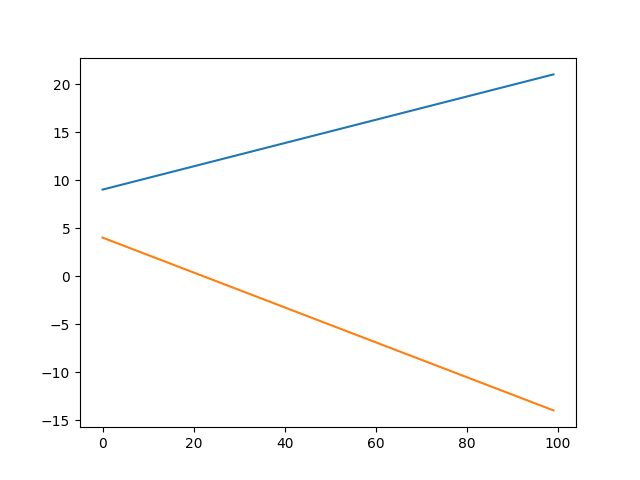

In [ ]:
#%%
# przekształćmy równanie do postaci "funkcyjnej"
# 2x - y = -1
# 3x + y = 16
#
x = np.linspace(4, 10, 100)
y_1 = lambda x: 1 + 2 * x
y_2 = lambda x: 16 - 3 * x
# y =

# nasze rozwiązanie jest w okolicach punktu (3,7)

# wykres 1
#%%
plt.figure()
plt.plot(y_1(x))
plt.plot(y_2(x))
# wykres 2

---
Przetestuj działanie funkcji ```np.hstack``` i ```np.vstack``` aby "skleić" ze sobą dwie wygenerowane na początku zajęć macierze

In [ ]:
np.hstack((MATRIX_A, IDENTITY))
np.vstack((MATRIX_A, IDENTITY))

matrix([[1, 2, 3],
        [4, 6, 7],
        [7, 4, 9],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

---

Jedną z metod wyznaczania macierzy odwrotnej jest metoda eliminacji Gaussa-Jordana. Polega ona na tym, że do naszej macierzy A "doklejamy" macierz jednostkową I

[ A | I ]

Teraz, stosując dozwolone operacje 
- mnożenie wiersza przez stałą <> 0
- dodawanie do wiersza innego wiersza (przemnożonego przez stałą <> 0)
- zamianę wierszy miejscami

dążymy do tego, aby uzyskać macierz postaci [ I | B ]

Jeśli nam się to uda, to B będzie macierzą odwrotną do A.


In [ ]:
# przykład:

A = np.matrix([[5, 6], [4, 5]])
print(A)

[[5 6]
 [4 5]]


In [ ]:
I = np.eye(2)
print(I)

[[1. 0.]
 [0. 1.]]


In [ ]:
M = np.hstack([A, I])
print(M)

[[5. 6. 1. 0.]
 [4. 5. 0. 1.]]


In [ ]:
# odejmijmy od drugiego wiersza wiersz pierwszy przemnożony przez 4/5
M[1, :] -= 4 / 5 * M[0, :]
print(M)

[[ 5.   6.   1.   0. ]
 [ 0.   0.2 -0.8  1. ]]


In [ ]:
# od pierwszego wiersza odejmijmy wiersz drugi przemnożony przez 30
M[0, :] -= 30 * M[1, :]
print(M.round(2))

[[  5.    0.   25.  -30. ]
 [  0.    0.2  -0.8   1. ]]


In [ ]:
# podzielmy pierwszy wiersz przez 5 i drugi przez 0.2
M[0, :] /= 5
M[1, :] /= 0.2

print(M)

[[ 1.00000000e+00  4.26325641e-15  5.00000000e+00 -6.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -4.00000000e+00  5.00000000e+00]]


In [ ]:
# czy to co jest po lewej stronie jest wystarczająco bliskie macierzy jednostkowej ?

print(M)
# print (M.round(2))

[[ 1.00000000e+00  4.26325641e-15  5.00000000e+00 -6.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -4.00000000e+00  5.00000000e+00]]


In [ ]:
# wyciągnijmy "prawą" stronę
B = M[:, 2:]

In [ ]:
# czy B ==  A^{-1} ?

print(B)
print(A**-1)

# Czy A*A^{-1} == I ?

[[ 5. -6.]
 [-4.  5.]]
[[ 5. -6.]
 [-4.  5.]]


Stosując powyższą metodę - wyznacz macierz odwrotną do macierzy

$$
\begin{bmatrix}
1 & 2 & 3 \\
0 & 1 & 4 \\
5 & 6 & 0
\end{bmatrix}
$$


In [ ]:
A = np.matrix([[1, 1, -1], [0, 2j, 1j], [3, 0, 1]])
display(Matrix(A))

Matrix([
[1.0,   1.0,  -1.0],
[  0, 2.0*I, 1.0*I],
[3.0,     0,   1.0]])

In [ ]:
S = np.hstack((A, np.eye(3)))
display(Matrix(S))

Matrix([
[1.0,   1.0,  -1.0, 1.0,   0,   0],
[  0, 2.0*I, 1.0*I,   0, 1.0,   0],
[3.0,     0,   1.0,   0,   0, 1.0]])

In [ ]:
S[2, :]
display(Matrix(S))

Matrix([
[1.0,   1.0,  -1.0, 1.0,   0,   0],
[  0, 2.0*I, 1.0*I,   0, 1.0,   0],
[3.0,     0,   1.0,   0,   0, 1.0]])